In [1011]:
import pandas as pd
!pip install nltk

In [1012]:
df = pd.read_csv('AB_NYC_2019.csv')

# EDA

In [1013]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [1014]:
df = df.rename(columns={'neighbourhood_group': 'n_group'}) #for ease of distinction with neighbourhood column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   n_group                         48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We will need to fill the missing values for `last_review` and `reviews_per_month` if we want to use them

In [1015]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
n_group                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [1016]:
df['last_review'] = pd.to_datetime(df['last_review'])
start_of_2020 = pd.to_datetime('2020-01-01')
df['days_since_last_review'] = (start_of_2020 - df['last_review']).dt.days #can't use datatime data otherwise
print(df['days_since_last_review'].corr(df['price']))

0.016810601705100264


In [1017]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  \
count                    48895.000000      48895.000000   
mean                         7.143982        112.781327   
std                         32.952519        131.622289   
min                          1.000000          0.000000   
25%                          1.000000          0.000000   
50%                          1.000000         45.000000   
75%                          2.000000        227.000000   
max                        327.000000        365.000000   

       days_since_last_review  
count            38843.000000  
mean               453.925418  
std                413.916984  
min                177.000000  
25%                192.000000  
50%                227.000000  
75%                542.000000  
max               3201.000000

I'm going to select `price` as my target and create a model to suggest a price to people listing a new property.

In [ ]:
import sweetviz as sv
sv_report = sv.analyze([df, 'Data'])
sv_report.show_notebook(layout='vertical')

* Fishers Kurtosis is approximately is large for `price`, `minimum_nights`, `reviews_per_month`, `calculated_host_listings_count`, `days_since_last_review` meaning there's a lot of Outliers
* `availability_365` is skewed to both top and bottom end of the range
* We will need to come up with treatments for the skewness and outliers

Looking at the heatmap under `associations`
* `room_types` and `neighbourhood` are strongly correlated with price
* Reviews per month and number of reviews probably contain very similar information, judging by correlation

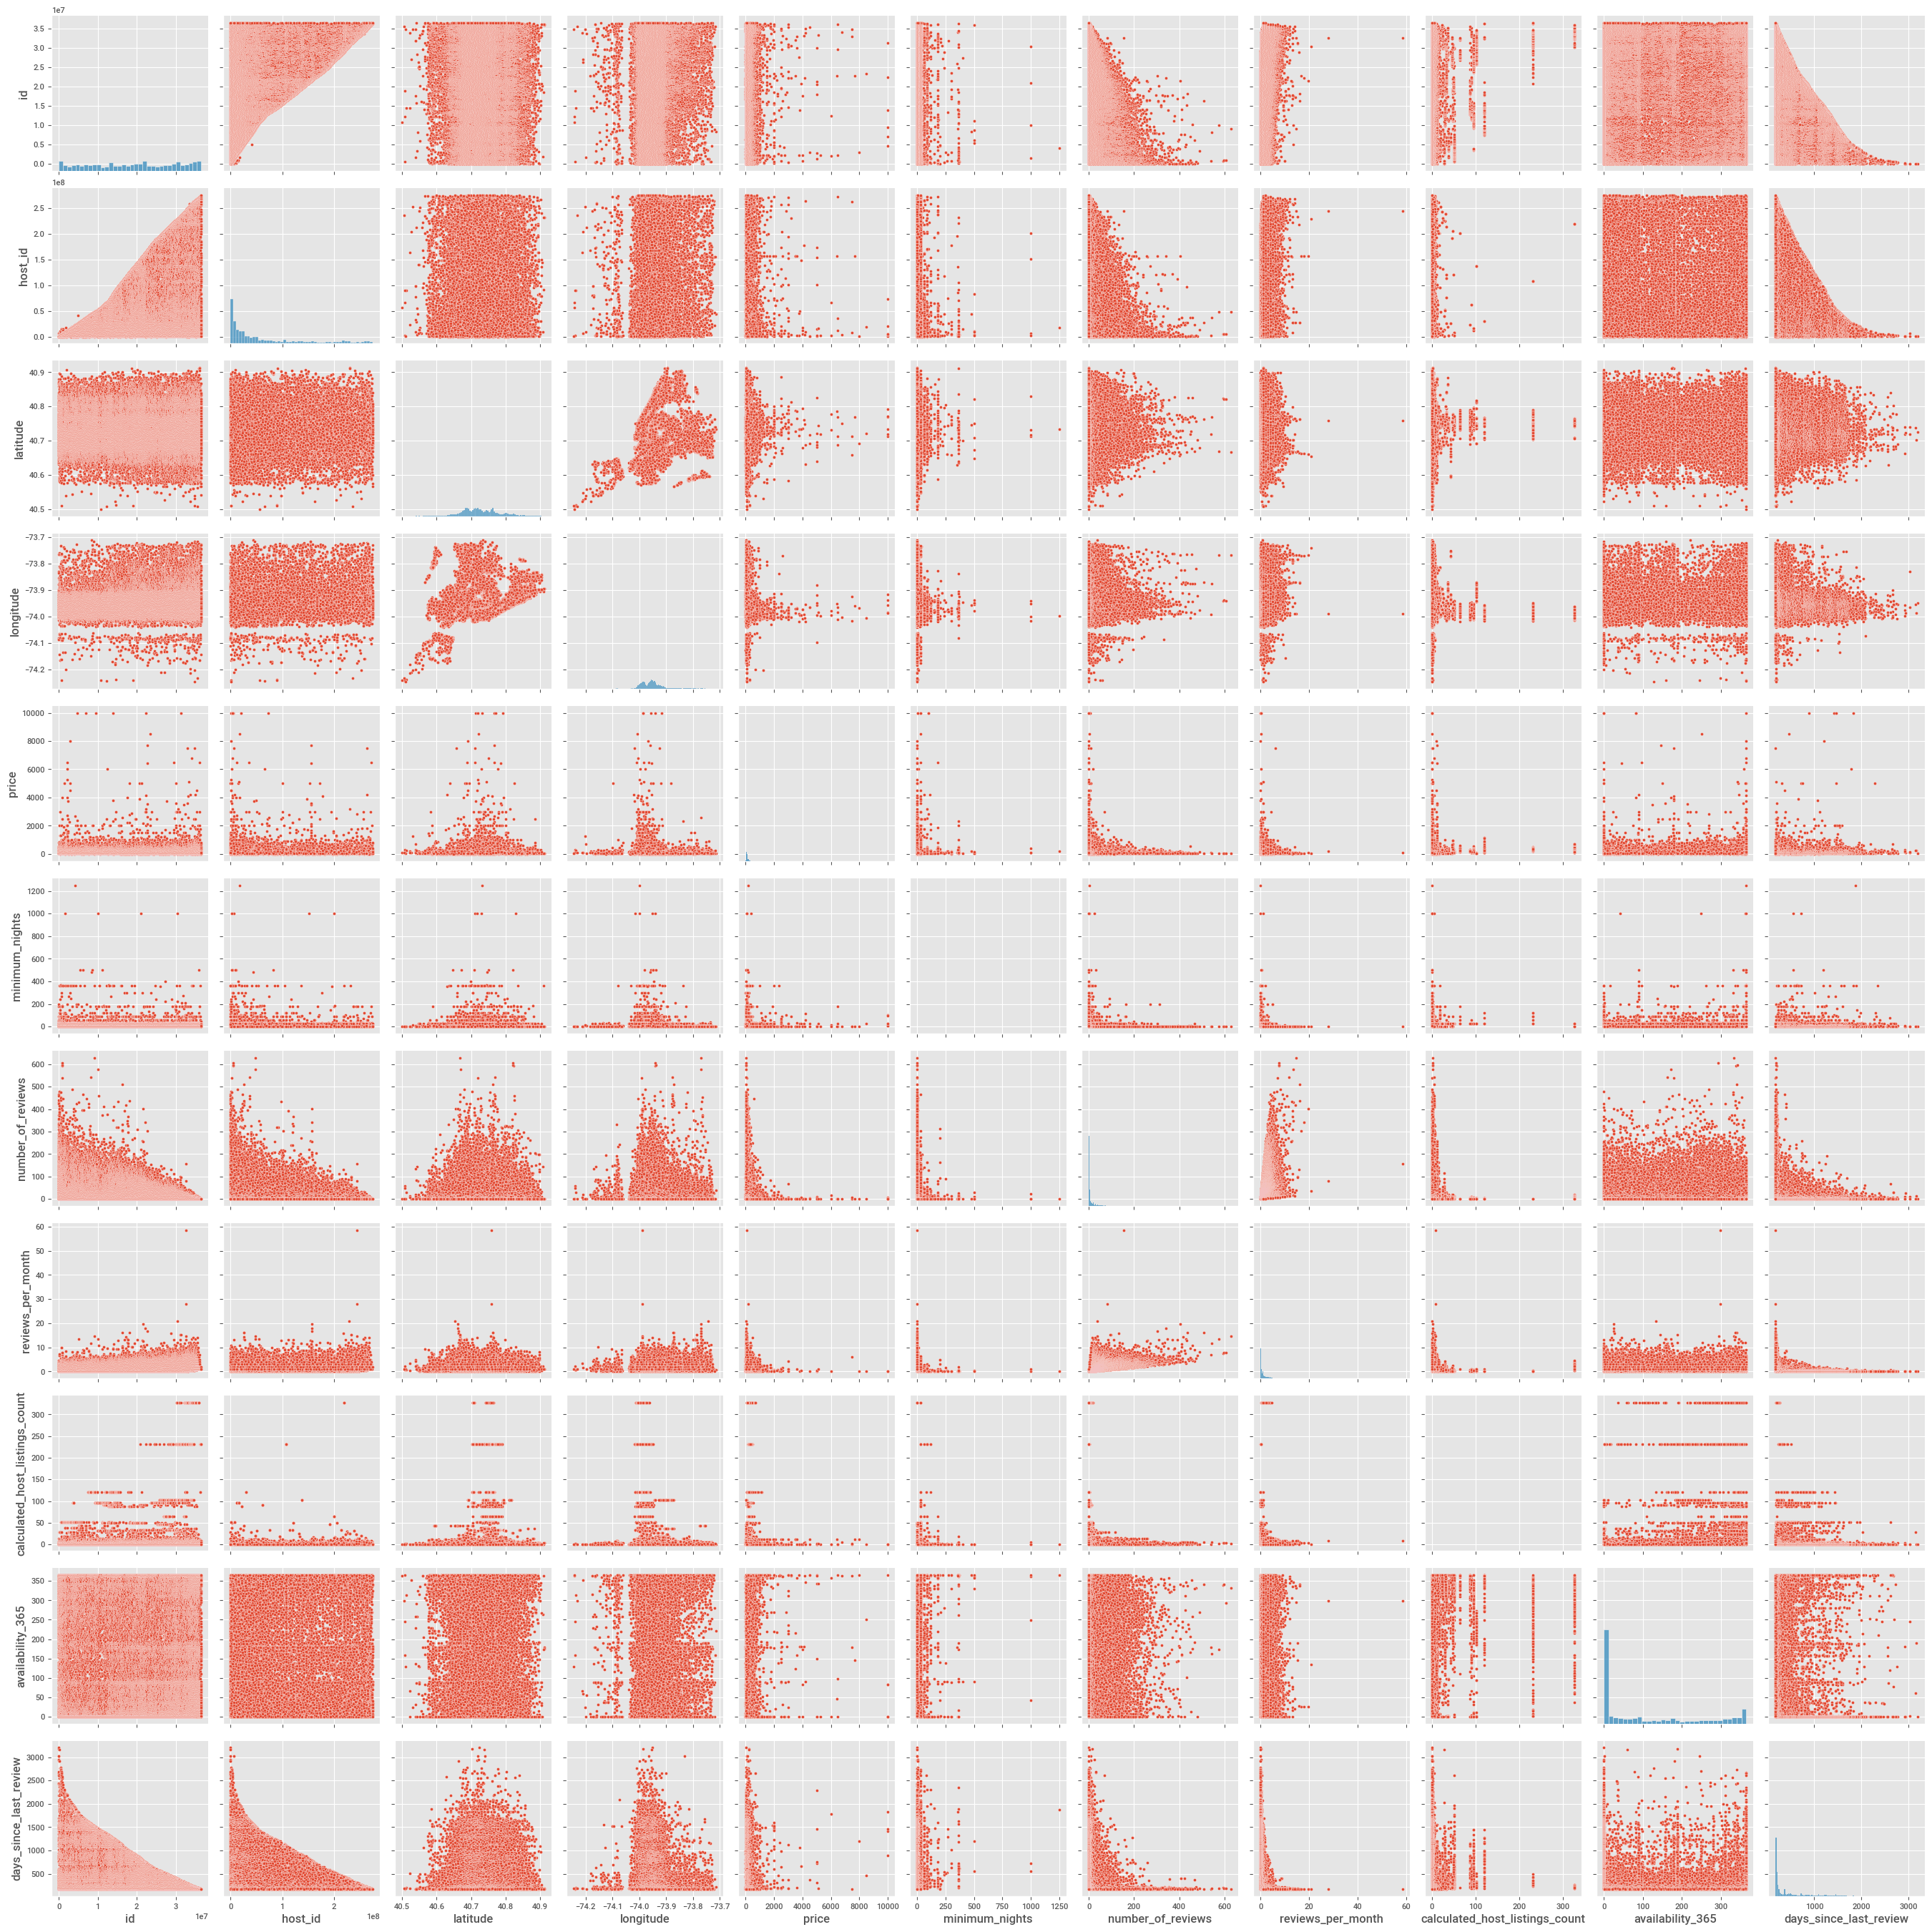

In [1019]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')

sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

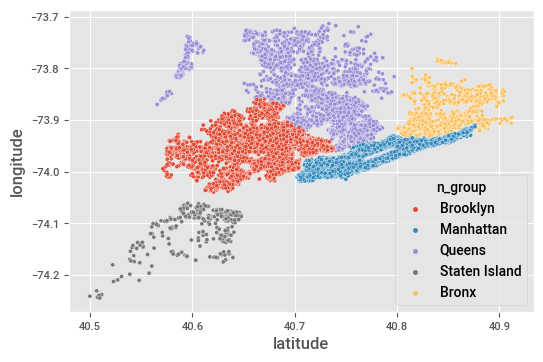

In [1020]:
# plt.scatter(df['latitude'], -df['longitude'])
# plt.xlabel('latitude')
# plt.ylabel('longitude')

sns.scatterplot(x=df['latitude'], y=df['longitude'], hue=df['n_group'])

Text(0.5, 1.0, 'availability_365 Histogram')

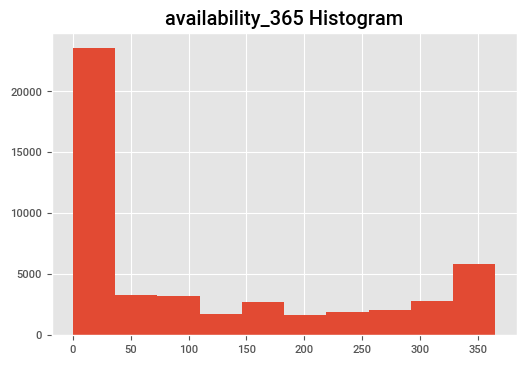

In [1021]:
df['availability_365'].hist()
plt.title('availability_365 Histogram')

* this plot explains why `latitude` and `longitude` are correlated, it's due to the geography of the location.
* `id` and `host_id` look like noise
* it looks like prices spike in the middle of the longitude range, which I guess makes sense as they're more central

<AxesSubplot:>

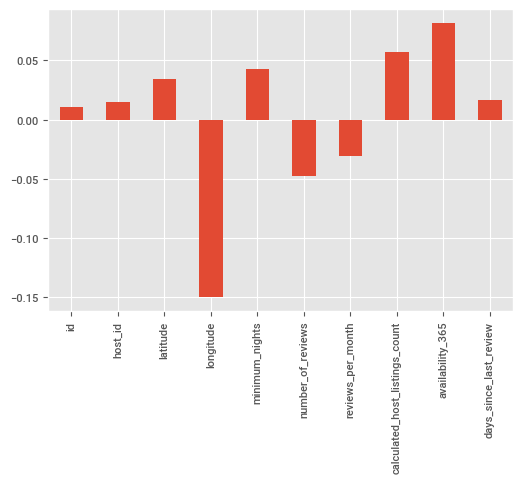

In [1022]:
df[[i for i in df.columns if i != 'price']].corrwith(df['price']).plot.bar()

* `host_id` and `id` are noise

# Feature Engineering

`availability_365` is very skewed to the upper and lower end of the distribution so won't be a lot of use for regression.

In [1023]:
df['avail_all_year'] = df['availability_365'] > 350
df['avail_low'] = df['availability_365'] < 15

In [1024]:
df['never_reviewed'] = df['number_of_reviews']==0

In [1025]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [1026]:
df['latitude'] = df['latitude'].abs() # box cox can't take negative numbers
df['longitude'] = df['longitude'].abs()

## `name` Variable

I'm going to extract some common words from the name variable to see if they have predictive power.

In [1027]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jackgolding/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jackgolding/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<AxesSubplot:xlabel='Word'>

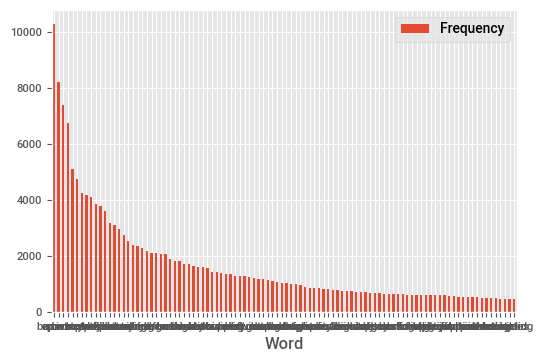

In [1028]:
import string
top_N = 100

txt = df.name.str.lower().str.translate(string.punctuation).str.cat(sep=' ')
tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z0-9]+')
words = tokenizer.tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english') 
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 


rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt.plot.bar(rot=0)

In [1029]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['name'].fillna('0'))

In [1030]:
text_counts_df = pd.DataFrame(text_counts.todense(), columns=cv.get_feature_names_out())
text_counts_df['price_'] = df['price'].values

I'll select the most correlated words that occur the most times.

In [1031]:
corrs = text_counts_df.corrwith(text_counts_df['price_']).sort_values()

In [1032]:
rslt = pd.DataFrame(words_except_stop_dist.most_common(1000),
                    columns=['Word', 'Frequency']).set_index('Word')
corrs = pd.DataFrame(corrs, columns=['correlation'])
corrs['correlation_abs'] = corrs['correlation'].abs()
corrs = corrs.sort_values(by=['correlation_abs'], ascending=False)

In [1033]:
limit = 40
corr_count = corrs.merge(rslt, left_index=True, right_index=True)
corr_count = corr_count[corr_count['Frequency']>100]
corr_count = corr_count.sort_values(by=['correlation_abs'], ascending=False).head(limit)
corr_count = corr_count.sort_values(by=['correlation'])
print(len(corr_count))
text_counts_df_join = text_counts_df[list(corr_count.index)]

40


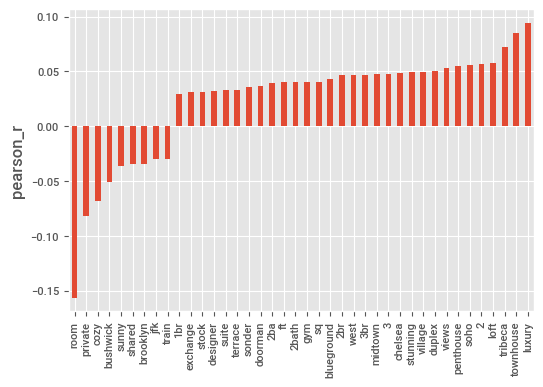

In [1034]:
corr_count['correlation'].plot.bar(rot=90)
plt.ylabel('pearson_r')
plt.show()

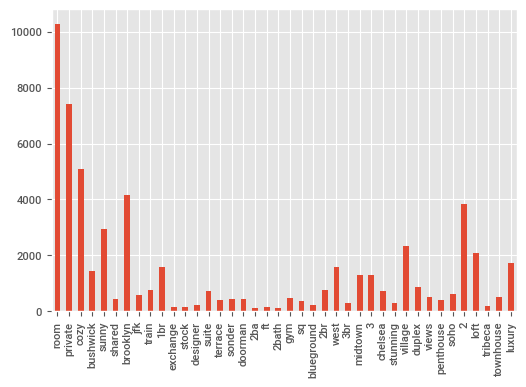

In [1035]:
corr_count['Frequency'].plot.bar(rot=90)
plt.show()

## `neighbourhood` Variable

In [1036]:
df['neighbourhood'] = df['neighbourhood'].str.lower()
df['n_group'] = df['n_group'].str.lower()

In [1037]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'n_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'days_since_last_review', 'avail_all_year', 'avail_low',
       'never_reviewed'],
      dtype='object')

<AxesSubplot:>

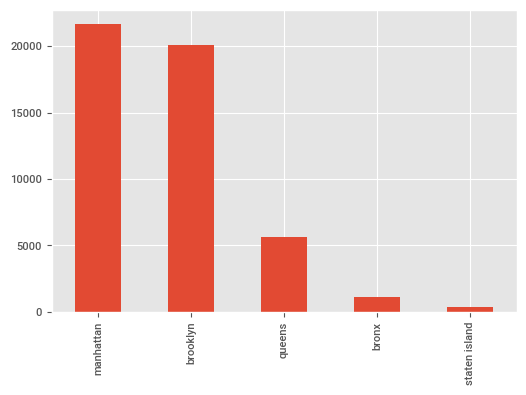

In [1038]:
df['n_group'].value_counts().plot.bar()

Text(0, 0.5, '% of total')

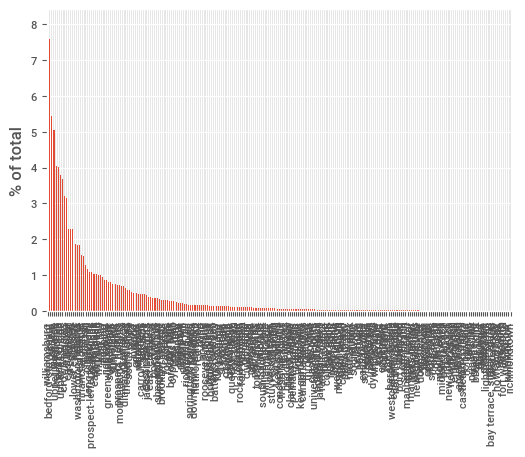

In [1039]:
(df['neighbourhood'].value_counts()/len(df) *100).plot.bar()
plt.ylabel('% of total')

There are a lot of neighbourhoods. To trim this down I'll find the most common ones.

In [1040]:
df['neighbourhood'].value_counts()

williamsburg          3920
bedford-stuyvesant    3714
harlem                2658
bushwick              2465
upper west side       1971
                      ... 
new dorp                 1
fort wadsworth           1
woodrow                  1
willowbrook              1
richmondtown             1
Name: neighbourhood, Length: 221, dtype: int64

In [1041]:
lim = 0.85
count= 0
vc = df['neighbourhood'].value_counts()/len(df)
common_neighbourhoods = []
for i in range(len(vc)):
    count += vc[i]
    if count > lim:
        print(i)
        print(vc.index[i])
        break
    common_neighbourhoods.append(vc.index[i])

44
woodside


In [1042]:
print(df.columns)
df.loc[df['number_of_reviews']==0, 'last_review'].value_counts()

Index(['id', 'name', 'host_id', 'host_name', 'n_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'days_since_last_review', 'avail_all_year', 'avail_low',
       'never_reviewed'],
      dtype='object')


Series([], Name: last_review, dtype: int64)

In [1043]:
import numpy as np
df['neighbourhood'] = np.where(df['neighbourhood'].isin(common_neighbourhoods), df['neighbourhood'], np.nan)

Text(0, 0.5, 'frequency')

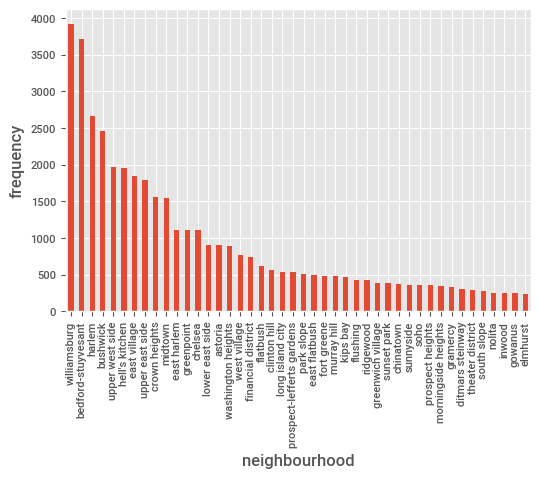

In [1044]:
df['neighbourhood'].value_counts().plot.bar()
plt.xlabel('neighbourhood')
plt.ylabel('frequency')
# len(df['neighbourhood'].unique())

## Putting the data together

In [976]:
df_model = pd.concat([df, text_counts_df_join.add_prefix('name_')], axis=1)

In [977]:
df_model = pd.get_dummies(df_model, columns=['neighbourhood', 'n_group', 'room_type'])

In [978]:
corrs = df_model.corrwith(df_model['price']).sort_values()
print(corrs)
thresh = 0.02
useful_cols = corrs[(corrs>thresh) |(corrs<-thresh)].index

room_type_Private room      -0.240246
name_room                   -0.156231
n_group_brooklyn            -0.098603
name_private                -0.081946
n_group_queens              -0.080205
                               ...   
neighbourhood_midtown        0.097781
longitude                    0.150019
n_group_manhattan            0.163976
room_type_Entire home/apt    0.255857
price                        1.000000
Length: 106, dtype: float64


In [979]:
df_model = df_model[list(useful_cols)]

In [994]:
df_model.to_csv('processed_data.csv', index=False)

# Modelling

In [995]:
from skopt.space import Real, Categorical, Integer
import xgboost
import pickle as pkl
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import SelectFromModel

In [996]:
df = pd.read_csv('processed_data.csv', index_col=False)

In [997]:
target = 'price'
exclude = ['host_name', 'host_id', 'id', 'name', 'neighbourhood',  'n_group', 'availability_365',
           'room_type', 'days_since_last_review', 'last_review', 'reviews_per_month', 'price', 
           'days_since_last_review']
box_cox_columns = ['minimum_nights','number_of_reviews',
                     'calculated_host_listings_count']
features = [i for i in df.columns 
                if df[i].dtype!='object'
#                 and not
#                 (
#                          i.startswith('neighbourhood') 
#                      or i.startswith('n_group') 
#                      or i.startswith('name')
#                      or i.startswith('room_type')
#                 )
                and i not in exclude 
               ]
print(features)
print(len(features))

['room_type_Private room', 'name_room', 'n_group_brooklyn', 'name_private', 'n_group_queens', 'name_cozy', 'neighbourhood_bushwick', 'avail_low', 'neighbourhood_bedford-stuyvesant', 'room_type_Shared room', 'name_bushwick', 'number_of_reviews', 'n_group_bronx', 'neighbourhood_washington heights', 'name_sunny', 'name_shared', 'name_brooklyn', 'neighbourhood_harlem', 'neighbourhood_crown heights', 'name_jfk', 'name_train', 'neighbourhood_ridgewood', 'neighbourhood_flatbush', 'neighbourhood_sunnyside', 'neighbourhood_flushing', 'neighbourhood_elmhurst', 'neighbourhood_east flatbush', 'neighbourhood_astoria', 'neighbourhood_kips bay', 'neighbourhood_nolita', 'neighbourhood_gramercy', 'neighbourhood_east village', 'neighbourhood_murray hill', 'name_1br', 'neighbourhood_upper east side', 'neighbourhood_theater district', 'name_exchange', 'name_stock', 'name_designer', 'name_suite', 'name_terrace', 'latitude', 'name_sonder', 'name_doorman', 'neighbourhood_financial district', 'name_2ba', 'nam

In [998]:
from scipy.special import  inv_boxcox
from scipy.stats import boxcox


def box_cox(X_train, X_test, y_train, numerical_columns, target): # try PowerTransformer for this next time
    lam={}
    for i in X_train.columns:
        if i in numerical_columns:
            X_train[i], lam[i] = boxcox(X_train[i])
            X_test[i] = boxcox(X_test[i], lmbda=lam[i])
    y_train, lam[target] = boxcox(y_train)
    return X_train, X_test, y_train, lam

def transform_data(X_train, X_test, y_train, numerical_columns, target):
    for i in numerical_columns:
        if 0 in X_train[i] or 0 in X_test[i]:
            X_train[i] = X_train[i]+1.01
            X_test[i] = X_test[i]+1.01
    y_train = y_train+1.01
    X_train_bc, X_test_bc, y_train_bc, lam = box_cox(X_train, X_test, y_train, numerical_columns, target)
    return X_train_bc, X_test_bc, y_train_bc, lam

def inv_transform_pred(y_pred, lam, target):
    return inv_boxcox(y_pred, lam[target])-1.01


# Initial Run

In [999]:
X_t, X_test, y_t, y_test = train_test_split(df[features], df[target], test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1, random_state=1)


In [1000]:
X_train, X_val, y_train, lam = transform_data(X_train, X_val, y_train, box_cox_columns, target)
y_val = boxcox(y_val+1.01, lmbda=lam[target])

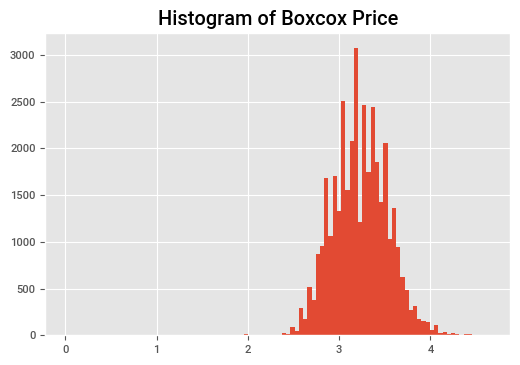

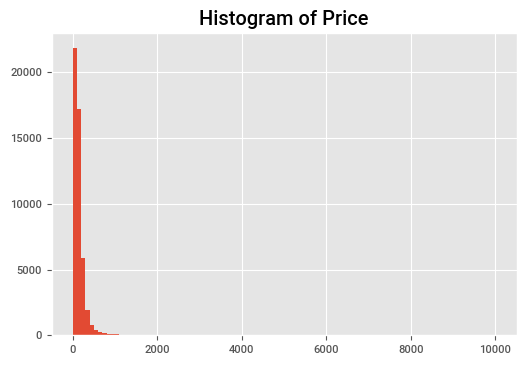

In [1001]:
pd.Series(y_train).hist(bins=100)
plt.title('Histogram of Boxcox Price')
plt.show()
df['price'].hist(bins=100)
plt.title('Histogram of Price')
plt.show()

In [1002]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

model = make_pipeline(RobustScaler(), xgb.XGBRegressor())

In [1003]:
model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [1004]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
accuracy = mean_absolute_error(y_train, y_pred)
print(f'In Sample error: {accuracy}')


In Sample error: 0.11483777982741615


In [1005]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_val)
accuracy = mean_absolute_error(y_val, y_pred)
print(f'Out Of Sample error: {accuracy}')

Out Of Sample error: 0.13338083558131356


In [1006]:
y_pred = model.predict(X_val)

accuracy = mean_absolute_error(inv_transform_pred(y_val, lam, target), 
                               inv_transform_pred(y_pred, lam, target))
print(f'Real Error: {accuracy}')

Real Error: 57.883988879757254


In [1007]:
median_absolute_error(inv_transform_pred(y_val, lam, target), inv_transform_pred(y_pred, lam, target))

22.9569053649902

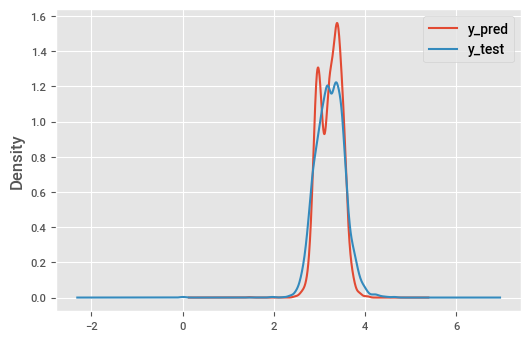

In [1008]:
d = pd.DataFrame({'y_pred':model.predict(X_val), 'y_test':y_val})
d.plot.kde()
plt.show()

# Parameter Tuning

I had a bayesian approach working but when I re-ran the notebook I got a nasty underflow error so I've had to swtich to a random search over the parameter space

In [786]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# params = {
#     'learning_rate': Real(0.01, 1.0, 'log-uniform'), # the step size shrinkage used in update to prevent overfitting
#     'max_depth': Integer(1, 50), # The maximum depth of a tree
# #     'max_delta_step': Real(0, 20), # regularisation incase of unbalanced classes
#     'reg_lambda': Real(1e-3, 1000, 'log-uniform'), # regularisation analagous to lambda in ridge regression
#     'reg_alpha': Real(1e-3, 1.0, 'log-uniform'), # regularisation analagous to lambda in LASSO regression
#     'gamma': Real(1e-3, 0.5, 'log-uniform'), # Gamma specifies the minimum loss reduction required to make a split
#     'min_child_weight': Real(1, 10), # analogous to minimum number of samples per split
#     'n_estimators': Integer(50, 100), # number of trees in the ensemble
#     'scale_pos_weight': Real(1e-3, 500, 'log-uniform') #controls the balance of positive and negative weights, useful for imbalanced classes.
# }

params = {
    'min_child_weight': [0.1, 1, 5],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [5, 10, 25, 50],
    'learning_rate': [0.0001, 0.001, 0.1, 1],
    'n_estimators': [50, 100, 250, 500],
    'reg_alpha': [0.0001, 0.001, 0.1, 1],
    'reg_lambda': [0.0001, 0.001, 0.1, 1]
    }

In [787]:
X_t, X_test, y_t, lam = transform_data(X_t, X_test, y_t, box_cox_columns, target)
y_test = boxcox(y_test+1.01, lmbda=lam[target])

In [788]:
from sklearn.pipeline import Pipeline
xgb_pipe = Pipeline(steps=[('rs',RobustScaler()), 
                           ('reg',xgb.XGBRegressor(objective='reg:pseudohubererror'))])

For scoring I'll select mean absolute error since there are a lot fo outliers and this score is not as harsh on them. For the loss function there is a twice differentiable function that also has this property called the pseudo huber loss which I will use.
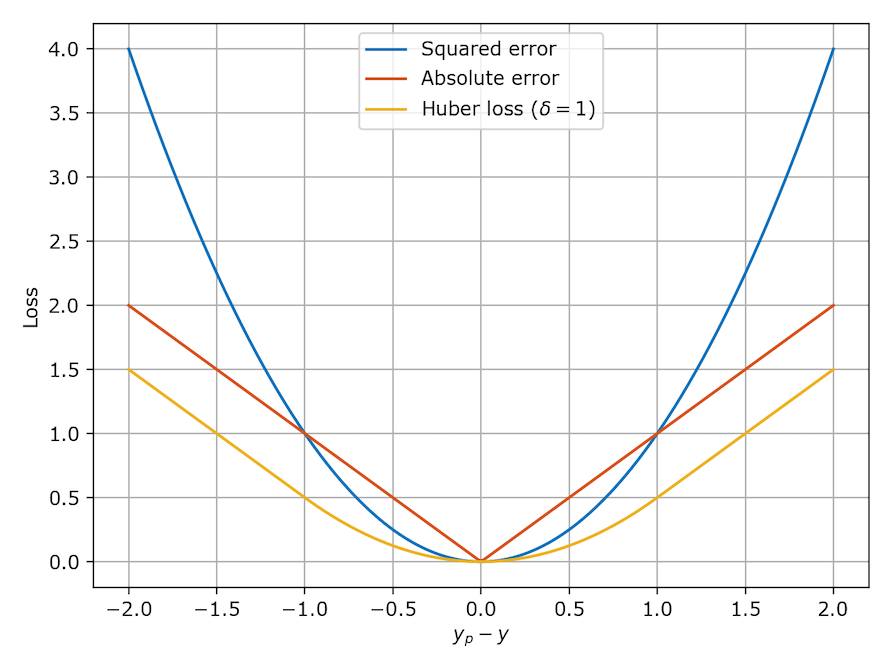

In [789]:
for old_key in list(params.keys()):
    params[f'reg__{old_key}'] = params[old_key]
    del params[old_key]
kf = KFold(n_splits=5,random_state=1,shuffle=True)
bayes=RandomizedSearchCV(estimator = xgb_pipe, param_distributions=params, n_iter=50, scoring='neg_mean_absolute_error',
                    cv=kf.split(X_t,y_t), random_state=42, n_jobs = -1, verbose=1)
res=bayes.fit(X_t, y_t)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [790]:
res.best_estimator_

Pipeline(steps=[('rs', RobustScaler()),
                ('reg',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.6, enable_categorical=False,
                              gamma=0.5, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=0.1, missing=nan,
                              monotone_constraints='()', n_estimators=250,
                              n_jobs=8, num_parallel_tree=1,
                              objective='reg:pseudohubererror',
                              predictor='auto', random_state=0, reg_alpha=0.1,
                              reg_lambda=0.1, scale_pos_weight=1, subsample=0.8,
                              tree_method='exact', validate_parameters=1,
           

In [791]:
# save the model to disk
model_filename = 'best_model.xz'
pkl.dump(res.best_estimator_, open(model_filename, 'wb'))

In [792]:
res.best_params_

{'reg__subsample': 0.8,
 'reg__reg_lambda': 0.1,
 'reg__reg_alpha': 0.1,
 'reg__n_estimators': 250,
 'reg__min_child_weight': 0.1,
 'reg__max_depth': 10,
 'reg__learning_rate': 0.1,
 'reg__gamma': 0.5,
 'reg__colsample_bytree': 0.6}

In [793]:
res.best_score_

-0.14490649852091914

# Testing Tuned Model

In [794]:
# load the model from disk
loaded_model = pkl.load(open(model_filename, 'rb'))

In [795]:
loaded_model.fit(X_t, y_t)
y_pred = loaded_model.predict(X_test)
accuracy = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.1444556757044957


In [796]:
pe = (y_test - y_pred)

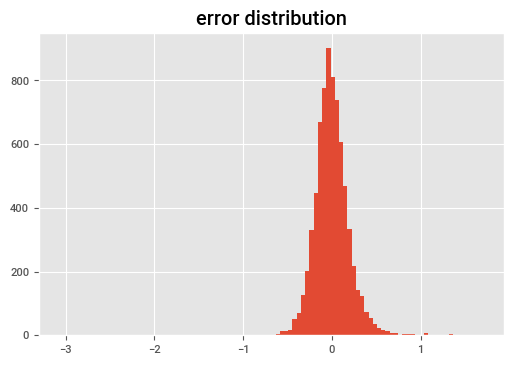

In [797]:
pd.Series(pe).hist(bins=100)
plt.title('error distribution')
plt.show()

In [798]:
pe_inv = inv_transform_pred(y_test, lam, target) - inv_transform_pred(y_pred, lam, target)

In [877]:
er_df = pd.DataFrame({'err': pe_inv, 'true':inv_transform_pred(y_test, lam, target)})

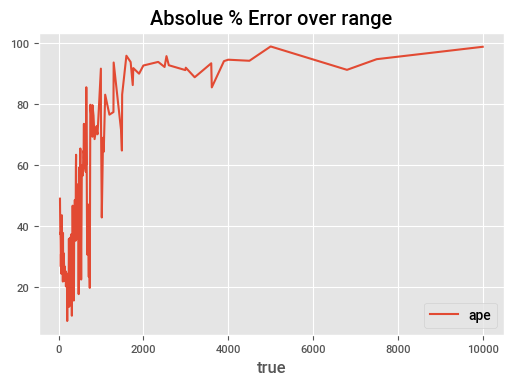

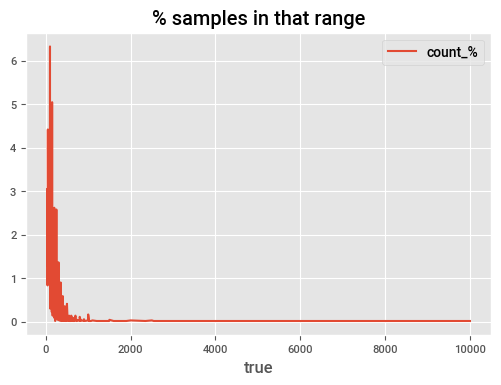

In [898]:
er_df['bin'] = er_df['true']//4
er_df['abs_err'] = er_df['err'].abs()
er_df_grp = er_df.groupby(['bin'])[['abs_err', 'true']].mean()
er_df_grp['count'] = er_df.groupby(['bin'])['true'].count()
er_df_grp['ape'] = er_df_grp['abs_err']/er_df_grp['true']*100
er_df_grp['count_%'] = er_df_grp['count']/er_df_grp['count'].sum() *100
er_df_grp = er_df_grp[er_df_grp['true']>30]

er_df_grp.set_index('true')[['ape']].plot()
plt.title('Absolue % Error over range')
plt.show()
er_df_grp.set_index('true')[[ 'count_%']].plot()
plt.title('% samples in that range')
plt.show()


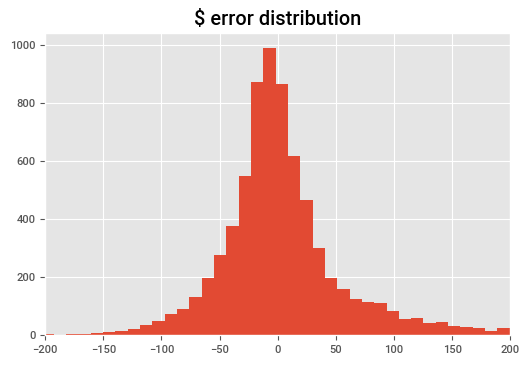

In [799]:
pd.Series(pe_inv).hist(bins=1000)


plt.title('$ error distribution')
plt.xlim(-200, 200)
plt.show()

The model generalises to new data consistantly

In [800]:
import shap

In [801]:
explainer = shap.TreeExplainer(loaded_model[1])
X_test_df = pd.DataFrame(X_test, columns=features)

shap_values = explainer.shap_values(X_test_df)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [802]:
shap.initjs()

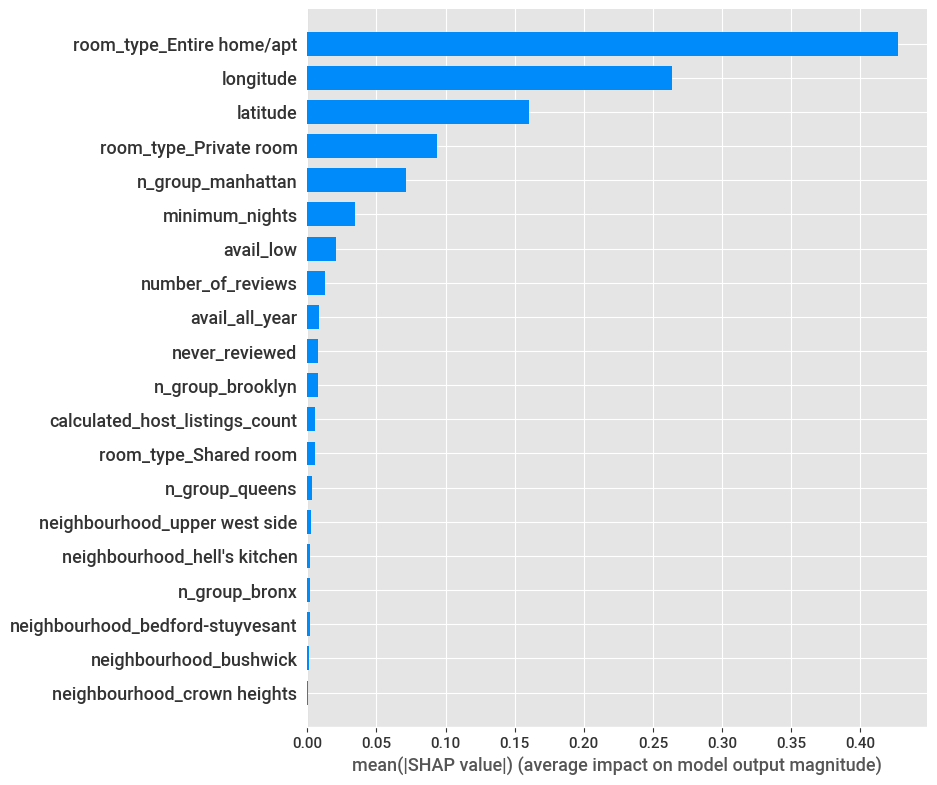

In [803]:
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

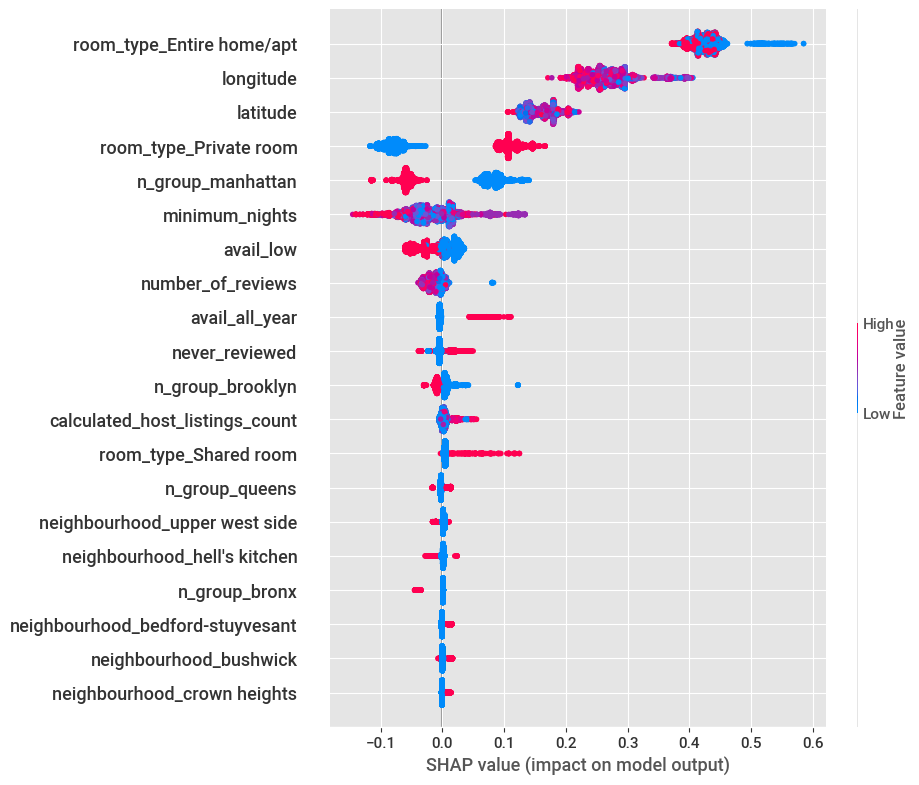

In [804]:
shap.summary_plot(shap_values, X_test_df)

* The Manhatten Neighbourhood Group is more expensive
* The higher the minimum available nights the more expensive
* The Bushwick area is cheaper

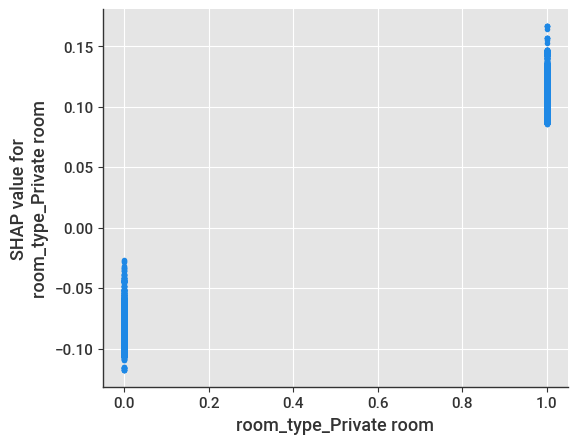

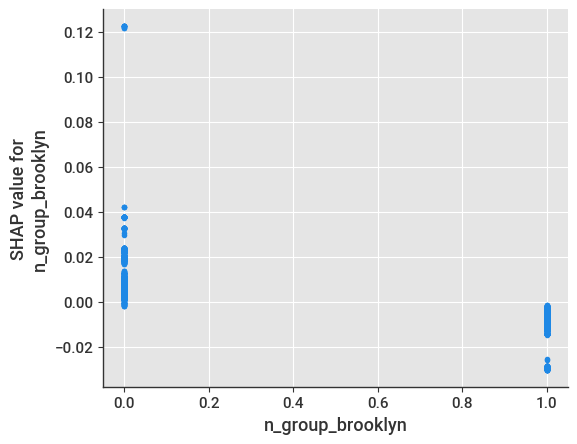

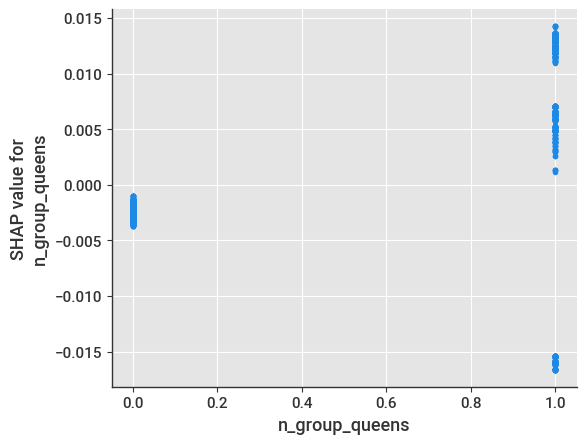

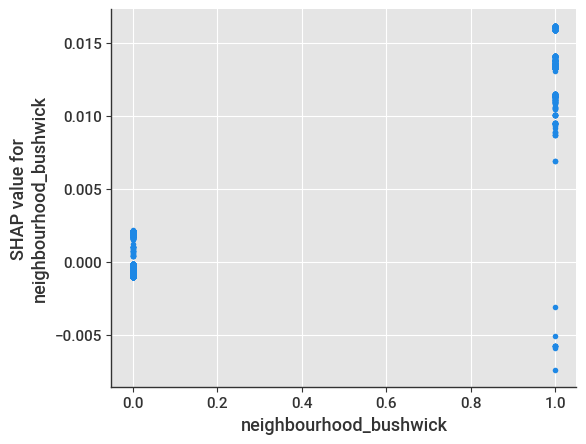

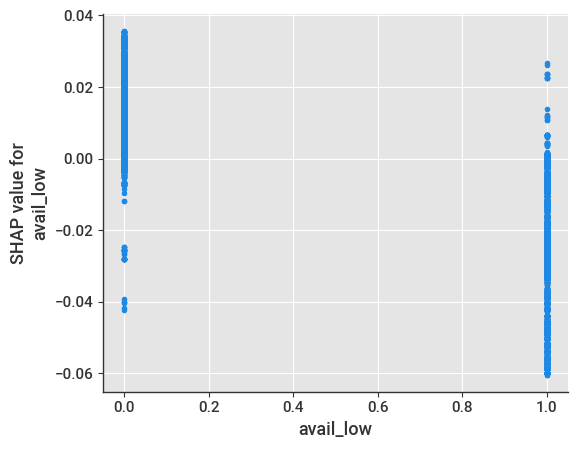

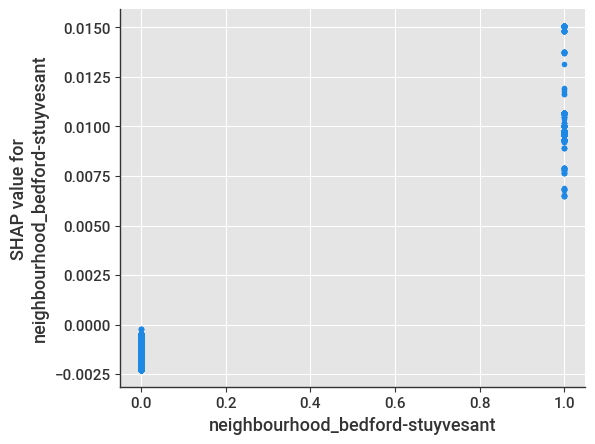

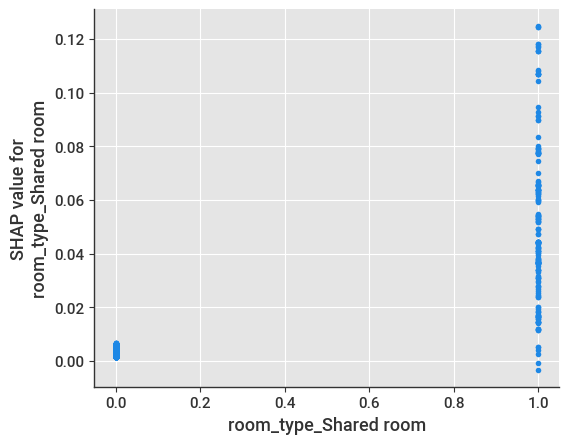

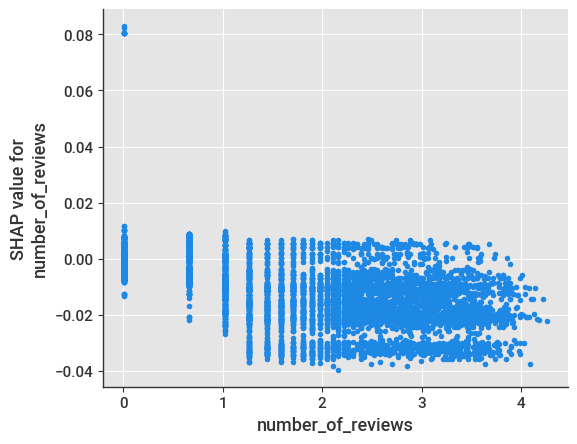

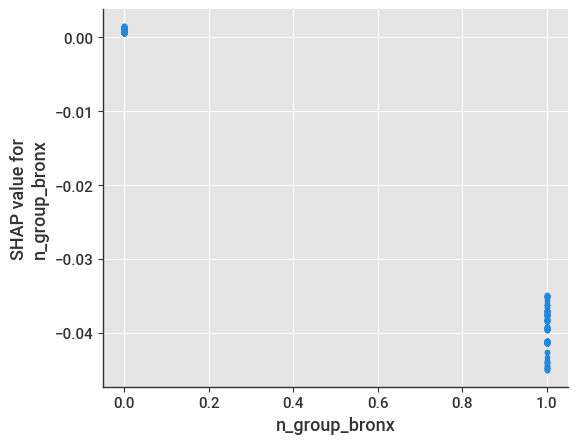

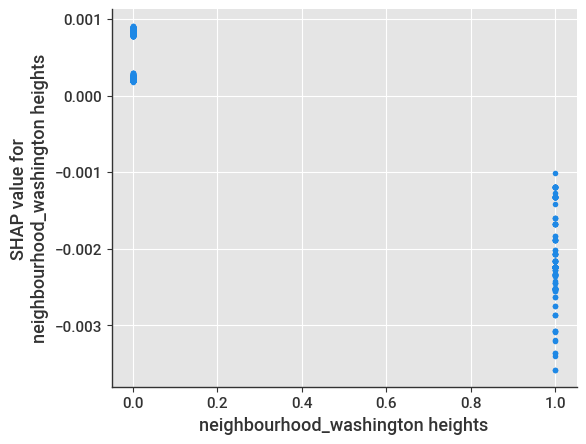

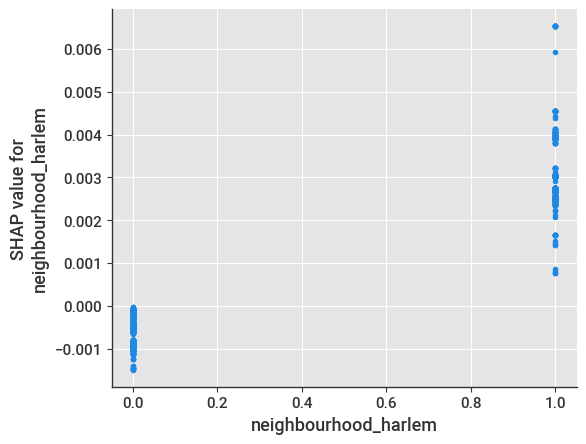

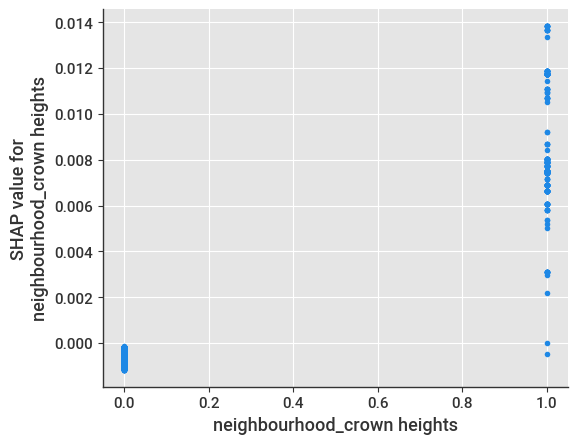

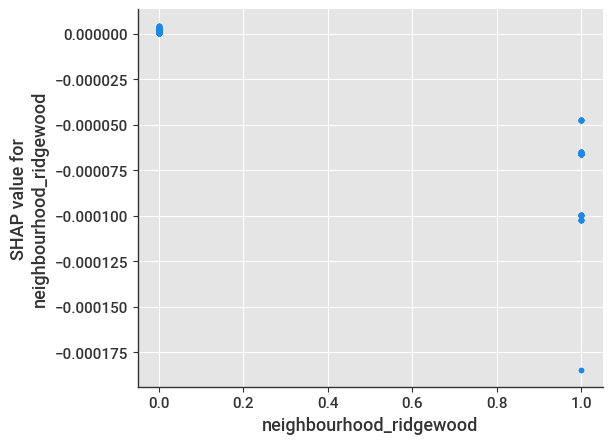

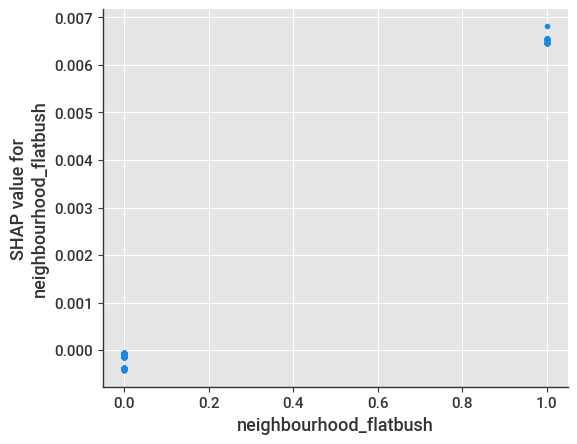

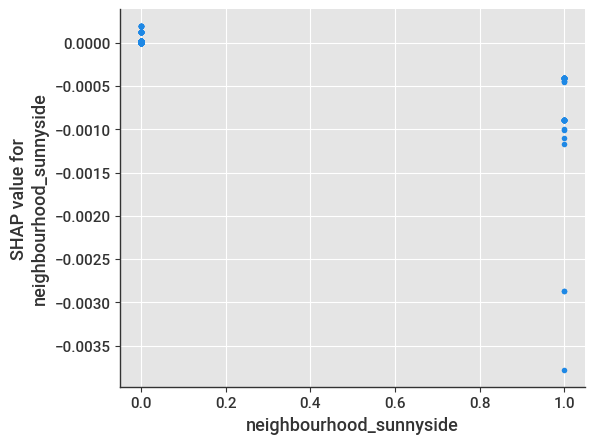

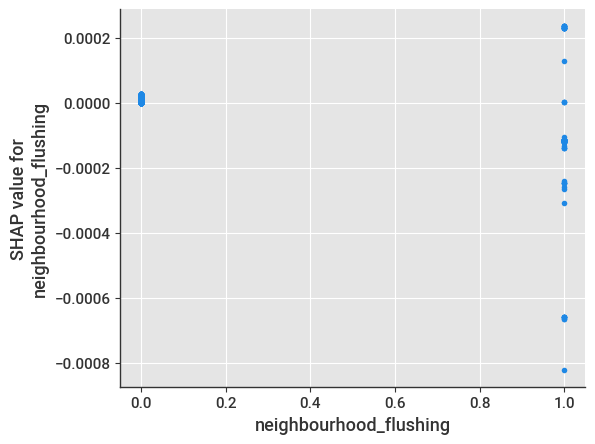

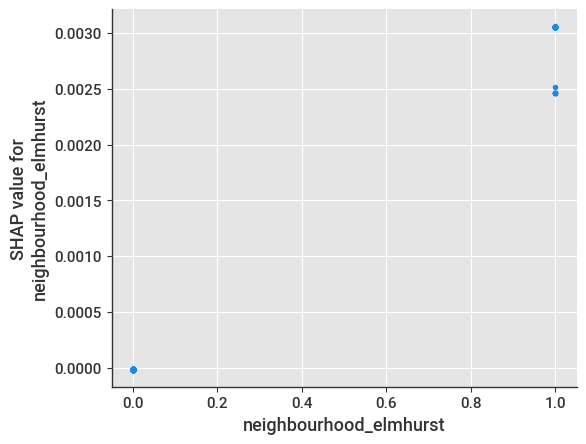

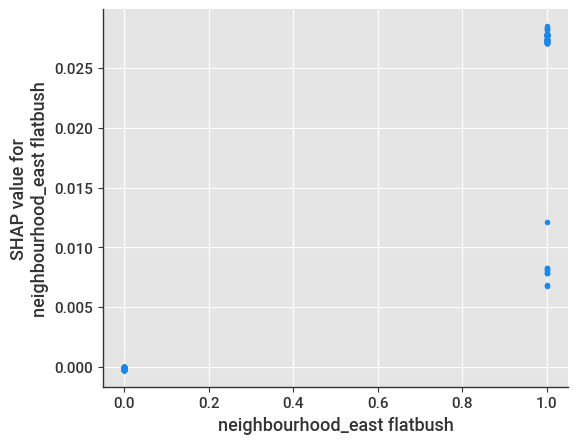

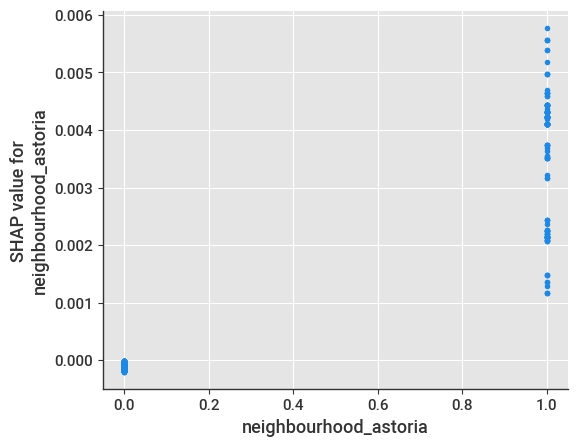

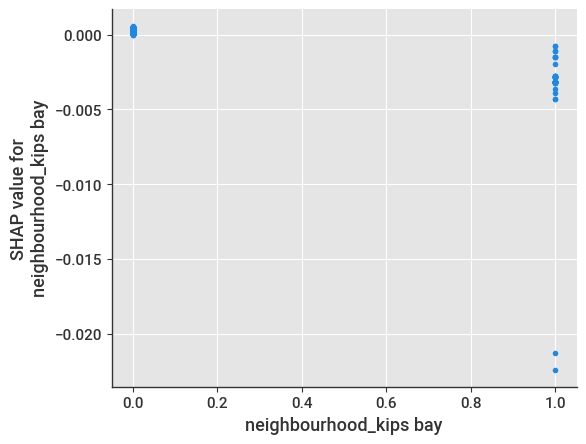

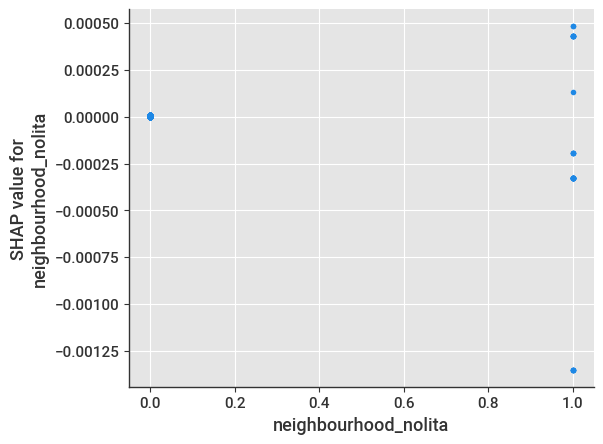

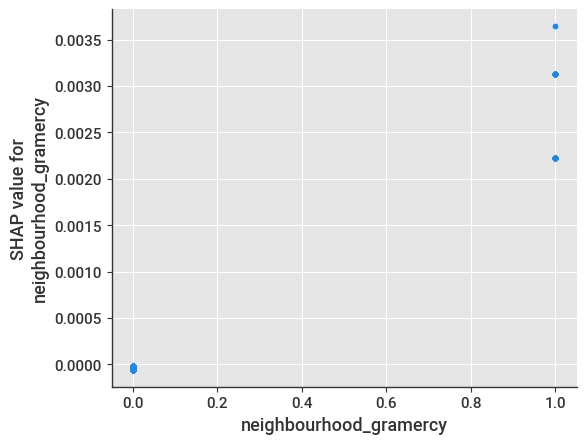

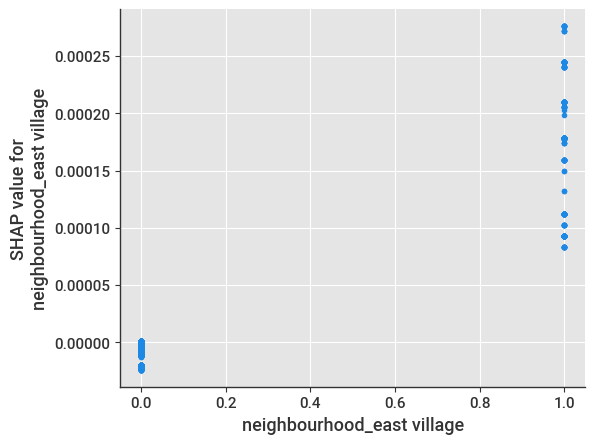

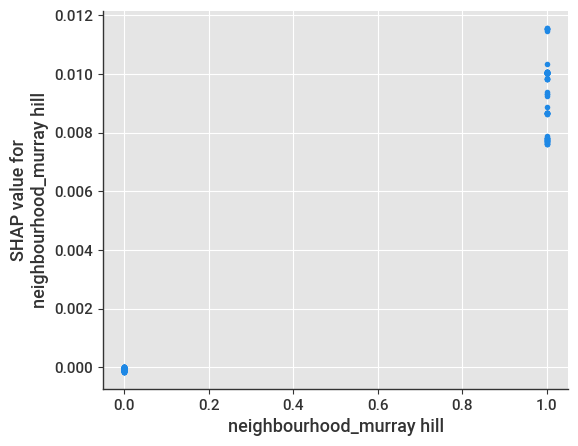

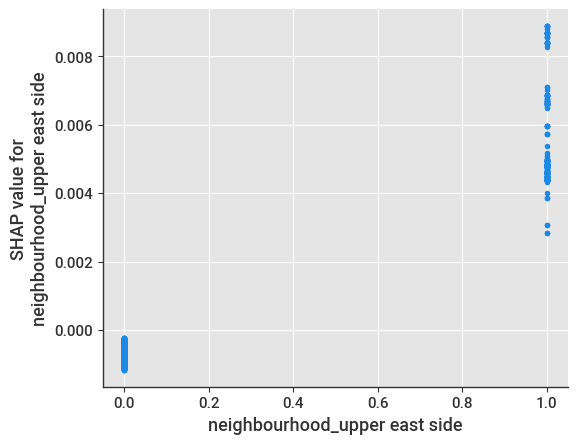

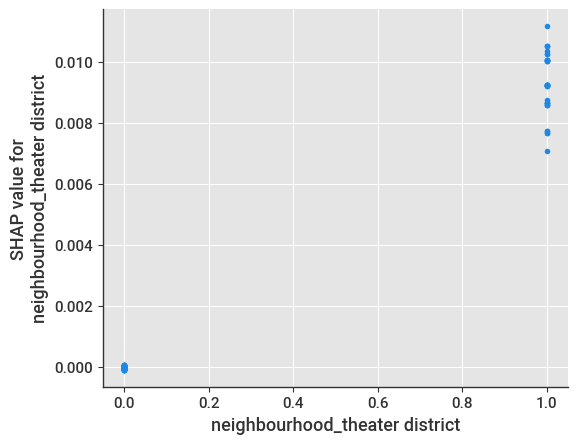

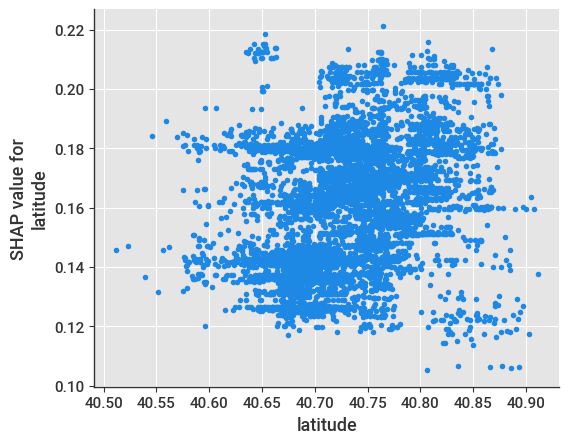

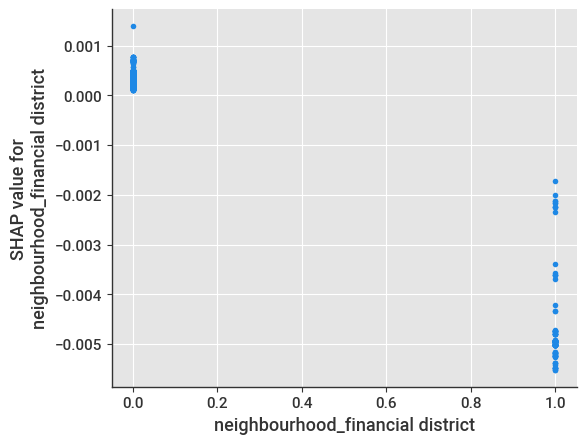

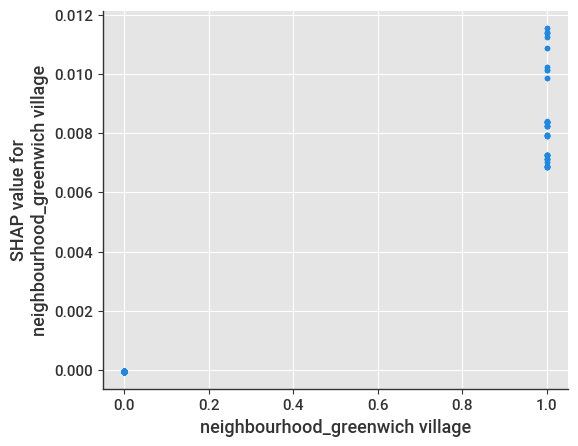

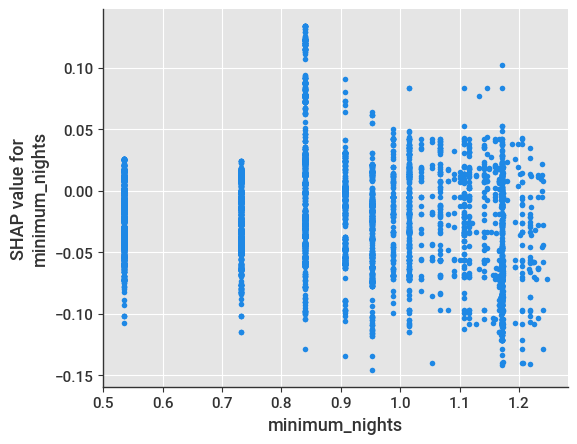

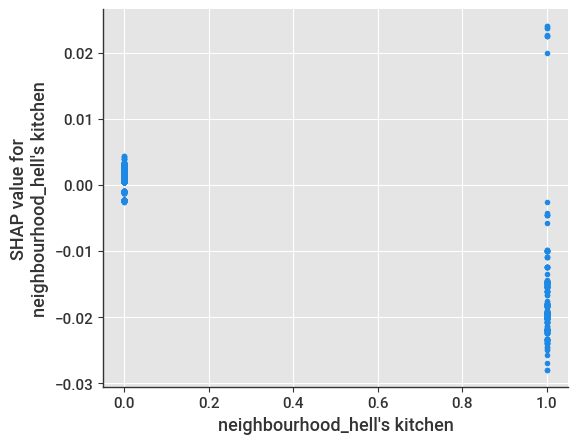

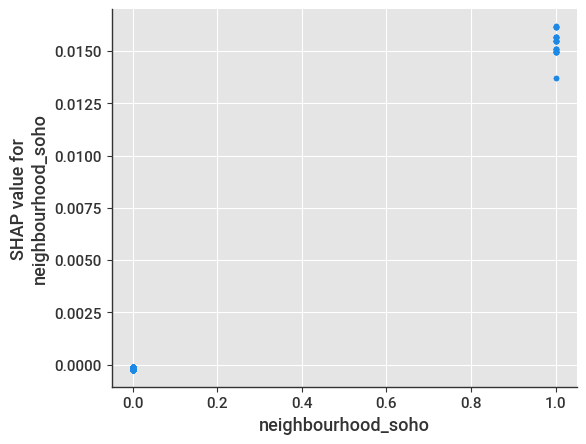

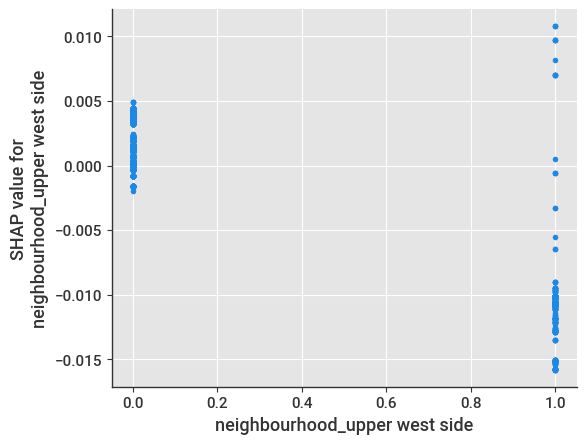

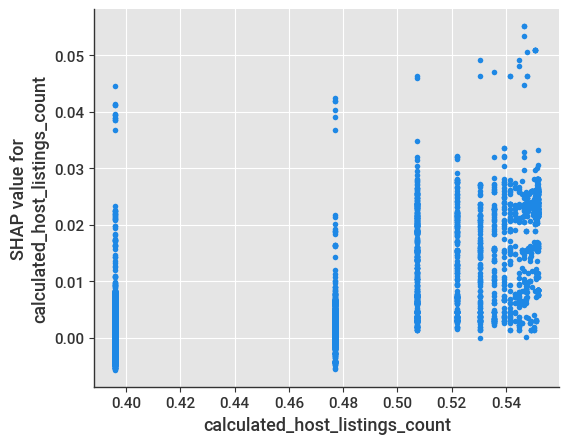

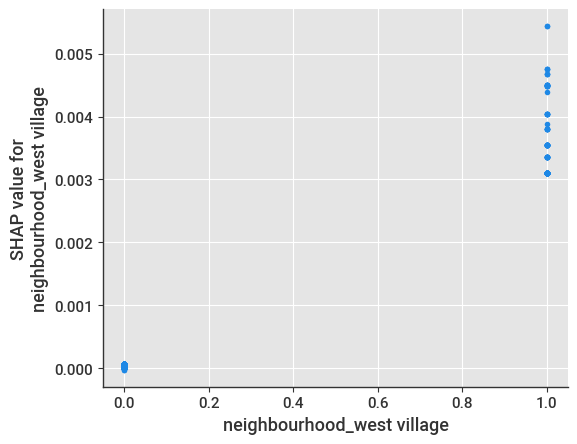

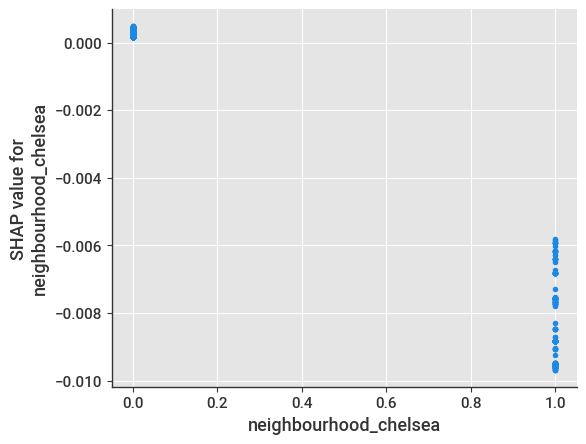

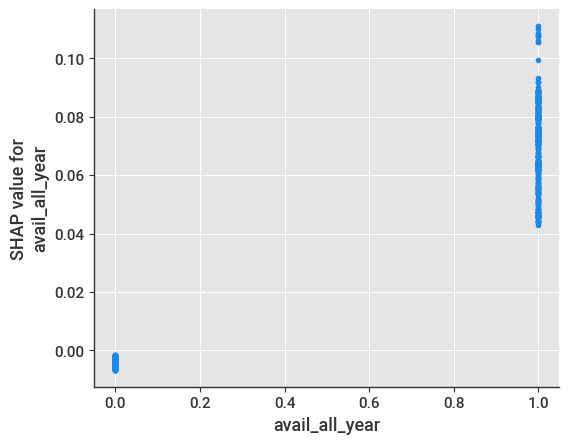

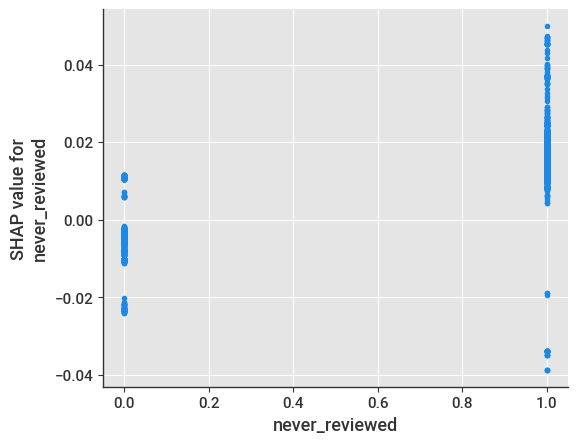

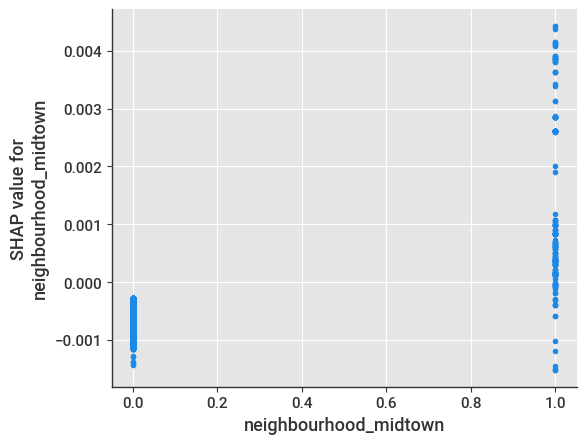

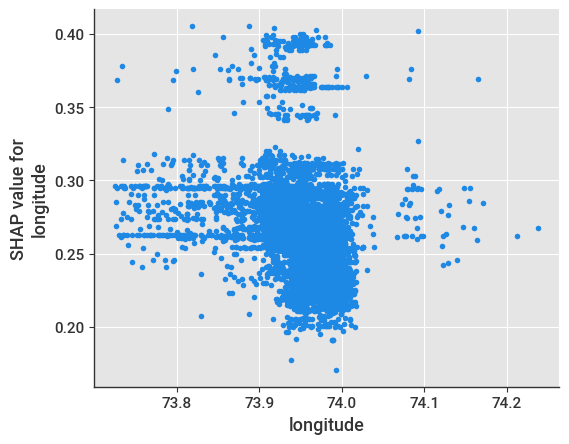

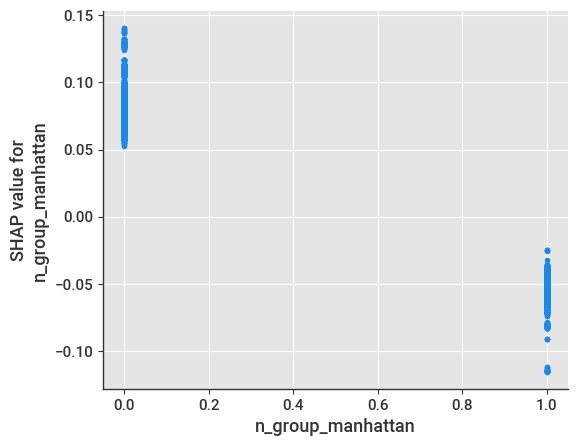

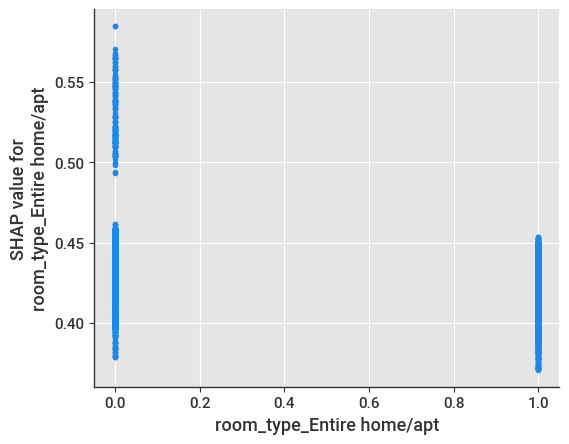

In [805]:
for name in X_test_df.columns:
    shap.dependence_plot(name, shap_values, X_test_df, interaction_index=None)

* `never_reviewed` have not effect on the model